In [6]:
import pandas as pd
import numpy as np
import os, random, math
from matplotlib import pyplot
from openalea.vmango.simulation.fruitmodel.fruit_model_main import growth_main
from openalea.vmango.simulation.fruitmodel.fruitmodel import initialize_input
from openalea.vmango.simulation.fruitmodel.fruitmodel_error import FruitModelValueError

In [7]:
path_hourly = '../../share/environment/weather_hourly_stpierre_2002.csv'
path_daily = '../../share/environment/weather_daily_stpierre_2002.csv'
path_sunlit = '../../share/environment/sunlit_fractions.csv'

In [8]:
df_hourly, df_daily, df_sunlit = initialize_input(path_hourly, path_daily, path_sunlit)

Input data has days with less than 24 h


In [9]:
bloom_date = '01/11/2002'
nb_fruits = 1
nb_leaves_treatments = [1, 10, 25, 50, 100, 150]

DM_fruit_0 = 0.97 * np.random.normal(13.9, 4.1) + 0.03 * np.random.normal(29.2, 0.66)
sunlit_bs = df_sunlit.iloc[:,random.randrange(0, 5)].to_numpy() 

0 1 Les parties vegetatives s'etouffent: le systeme meurt ...


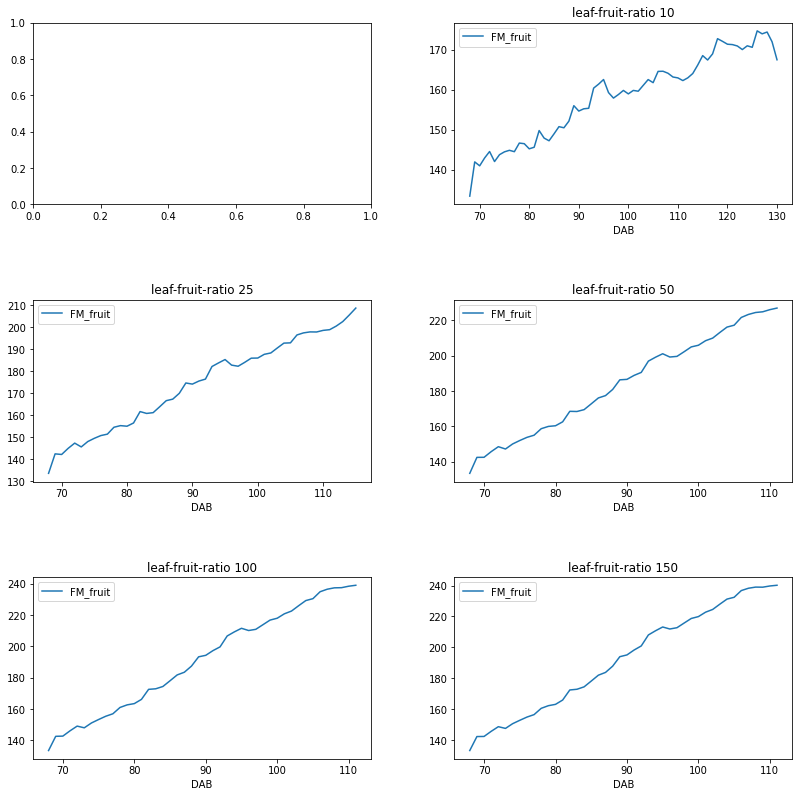

In [10]:
_, axs = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs = axs.flatten()
pyplot.tight_layout()

# chart layout from Lechaudel 2007, p. 226
for i, nb_leaves in enumerate(nb_leaves_treatments):
    df = None
    try:
        df = growth_main(bloom_date, nb_fruits, nb_leaves, DM_fruit_0, sunlit_bs, df_hourly, df_daily, verbose=False)
    except FruitModelValueError as e:
        print(i, nb_leaves, e)
        pass
    finally:
        if df is not None:
            df[['DAB', 'FM_fruit']].plot(x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves}', ax=axs[i], figsize=(12,12))